In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

#Load the file in a Data Frame
file = 'new_dataset_1.txt'
df = pd.read_csv(file,sep="\t", header=None)

In [2]:
 #Intial Assignment of clusters
def Initialization(k, gene_data):
    centroids = []
    for i in range(k):
        centroid_indices = int(input("Enter centroid gene data indices: "))
        centroids.append(gene_data[centroid_indices-1])
    centroids = np.asarray(centroids)
    return centroids

In [3]:
#Assignment of clusters
def assignment(centroids, gene_data):
    clusters = []
    for i in range(gene_data.shape[0]):
        dist = []
        for cent_point in centroids:
            dist.append(calc_distance(cent_point,gene_data[i]))
        index = np.argmin(dist)+1
        clusters.insert(i,index)
    return clusters
 
#Euclidean distance
def calc_distance(x1,x2):
    return (sum((x1 - x2)**2))**0.5

In [4]:
#Updating Centroids
def update_centroids(assigned_cluster,centroids,gene_data):
    updated_centroids = []
    gene_data = pd.DataFrame(gene_data)
    assigned_cluster = pd.DataFrame(assigned_cluster,columns=['Cluster'])
    df_cluster = pd.concat([gene_data,assigned_cluster], axis=1)
    
    for cent in set(df_cluster['Cluster']):
        cur_cluster = df_cluster[df_cluster['Cluster'] == cent][df_cluster.columns[:-1]]
        mean = cur_cluster.mean(axis=0)
        updated_centroids.append(mean)
    return updated_centroids

#Plotting the clusters
def plots(pca_data,assigned_cluster,file):
    df_new = pd.DataFrame({'y1':np.array(pca_data)[:,0], 'y2':np.array(pca_data)[:,1], 'clusters': assigned_cluster})
    sns.lmplot(x='y1', y='y2', data=df_new, fit_reg=False,hue='clusters',palette = 'dark', height=5,aspect = 1.5,legend_out = False)
    plt.title(file)

In [5]:
#Incident Matrix
def get_matrix(cluster_values):
    mat = np.zeros((len(cluster_values),len(cluster_values)))
    for i in range(len(cluster_values)):
        for j in range(len(cluster_values)):
                if(cluster_values[i] == cluster_values[j]):
                    mat[i][j] = 1
                else:
                    mat[i][j] = 0
    return mat

#Calculating m values using ground truth values and kmeans values
def external_index(ground_matrix, kmeans_matrix):
    m11 = 0
    m00 = 0
    m01 = 0
    m10 = 0
    for i in range(len(ground_matrix)):
        for j in range(len(kmeans_matrix)):
            if kmeans_matrix[i][j] == 1 and ground_matrix[i][j] == 1:
                m11 += 1
            elif kmeans_matrix[i][j] == 0 and ground_matrix[i][j] == 0:
                m00 += 1
            elif kmeans_matrix[i][j] == 0 and ground_matrix[i][j] == 1:
                m01 += 1
            elif kmeans_matrix[i][j] == 1 and ground_matrix[i][j] == 0:
                m10 += 1
    return m11, m00, m01, m10

Enter the number of clusters
4
Enter the number of iterations
10
Enter centroid gene data indices: 1
Enter centroid gene data indices: 2
Enter centroid gene data indices: 3
Enter centroid gene data indices: 4
[[-2.27989736  0.74778271]
 [ 1.90486293  0.04804751]
 [-3.21585769  0.14161557]
 [-2.59715948  1.10002193]
 [-2.68420713  0.32660731]
 [-3.22520045 -0.50327991]
 [ 3.79468686  0.25326557]
 [ 1.80234045 -0.21615461]
 [ 0.81245555 -0.16233157]
 [ 0.92757294  0.46823621]
 [ 1.92245088  0.40927118]
 [-2.67384469 -0.1066917 ]
 [ 1.5852673  -0.53930705]
 [-2.62522846  0.60680001]
 [-2.78743398 -0.22774019]
 [-2.58734619  0.52047364]
 [ 2.27585365  0.33338653]
 [ 0.93241075  0.31919809]
 [-2.38386932  1.34475434]
 [ 2.16537886  0.21528028]
 [-2.82089068 -0.08210451]
 [ 1.33104142  0.24466952]
 [ 2.53172698 -0.01184224]
 [-0.174864   -0.25181557]
 [ 1.34459422 -0.77641543]
 [-2.54323491  0.44003175]
 [-2.64832273  0.31913667]
 [ 1.52566363 -0.37502085]
 [-2.41007734  0.41808001]
 [ 0.134

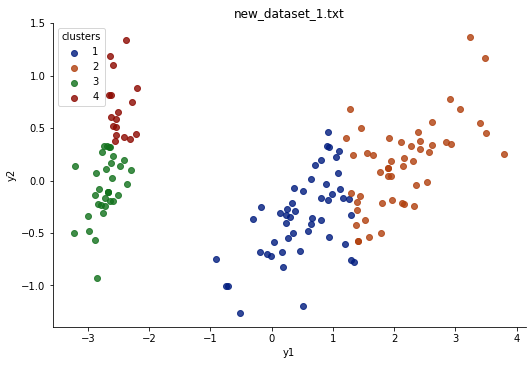

In [6]:
#Main Function
def __main__():
    
    #ground truth values
    gr_true_values = df[1]
    
    #Gene Data
    gene_data = df.iloc[:,2:].to_numpy().astype(np.float)

    #Niumber of clusters and iterations
    print('Enter the number of clusters')
    k = int(input())
    print('Enter the number of iterations')
    iterations = int(input())
    centroids = Initialization(k, gene_data)
    new_centroids = []

    #Algorithm
    for i in range(iterations):
        assigned_cluster = assignment(centroids,gene_data)
        new_centroids = update_centroids(assigned_cluster,centroids,gene_data)

        if pd.DataFrame(centroids).equals(pd.DataFrame(new_centroids)):
            break
        centroids = new_centroids

    #PCA Part
    pca_data = PCA(n_components=2).fit_transform(gene_data)
    
    print(pca_data)

    #Scatter Plots
    plots(pca_data,assigned_cluster,file)

    #Incident Matrices for both Ground truth values and Kmeans Cluster values
    ground_matrix = get_matrix(gr_true_values.to_numpy())
    kmeans_matrix = get_matrix(np.array(assigned_cluster))

    #External_indices
    m11,m00,m01, m10 = external_index(ground_matrix,kmeans_matrix)

    #Rand Index
    rand_index = (m11 + m00)/(m11 + m00 + m01 + m10)

    #Jaccard Coefficient
    j_coeff = (m11)/(m11 + m10 + m01)
    
    print("K-means Clustering Results for the K value {}".format(str(k)))
    print("--------------------------------------------")
    print("Rand Index for file {} is {}".format(file,str(rand_index)))
    print("Jaccard Coefficient for file {} is {}".format(file,str(j_coeff)))

__main__()